In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Potato___Early_blight: 988 images


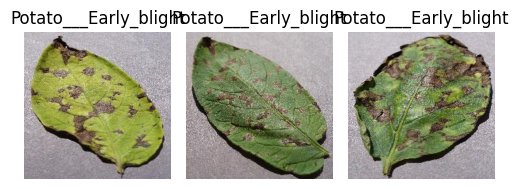

Potato___healthy: 152 images


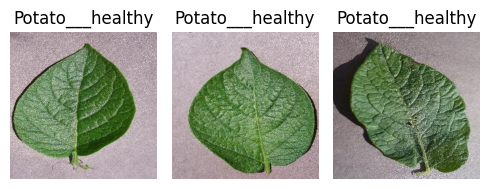

Potato___Late_blight: 1000 images


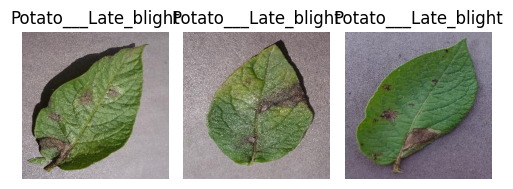

In [ ]:
#Problem 01 - Data Exploration
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = '/content/drive/MyDrive/Sem 7/ML/PlantVillage/Potato'  # Change to actual path
classes = os.listdir(base_dir)

for cls in classes:
    class_path = os.path.join(base_dir, cls)
    if os.path.isdir(class_path): # Check if it's a directory
        images_in_class = os.listdir(class_path)
        print(f"{cls}: {len(images_in_class)} images")

        # Sample image visualization only if the directory is not empty
        if images_in_class:
            plt.figure(figsize=(5, 2))
            # Ensure we don't sample more images than available
            num_samples = min(3, len(images_in_class))
            for i, img_file in enumerate(random.sample(images_in_class, num_samples)):
                img_path = os.path.join(class_path, img_file)
                img = mpimg.imread(img_path)
                plt.subplot(1, num_samples, i+1)
                plt.imshow(img)
                plt.title(cls)
                plt.axis('off')
            plt.tight_layout()
            plt.show()
    else:
        print(f"{cls}: is not a directory.")

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
# define paths

train_dir = '/content/dataset/potato'
validation_dir = '/content/dataset/potato'
test_data = '/content/dataset/test_data'


In [ ]:
#Problem 2- Image Preprocessing
image_size = (128, 128)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [ ]:
#Problem 3- Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4714 - loss: 1.3881

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.4726 - loss: 1.3819 - val_accuracy: 0.6977 - val_loss: 0.7429
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8204 - loss: 0.5342 - val_accuracy: 0.8488 - val_loss: 0.3488
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8752 - loss: 0.3093 - val_accuracy: 0.8628 - val_loss: 0.3276
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8913 - loss: 0.2879 - val_accuracy: 0.9279 - val_loss: 0.1675
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9159 - loss: 0.2218 - val_accuracy: 0.8930 - val_loss: 0.2321
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9127 - loss: 0.2146 - val_accuracy: 0.9605 - val_loss: 0.1172
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9421 - loss: 0.1294 - val_accuracy: 0.8930 - val_loss: 0.2295
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9562 - loss: 0.1172 - val_accuracy: 0.9721 - val_loss: 0.0932
Ep

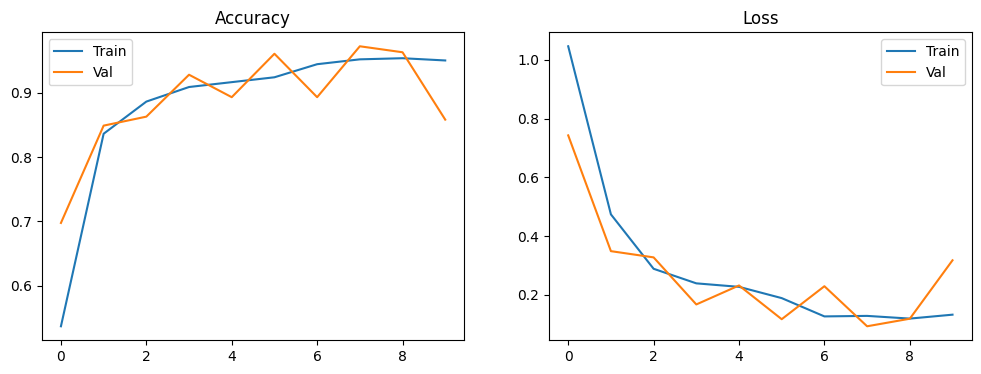

In [46]:
#Problem 4 - Compilation and Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step


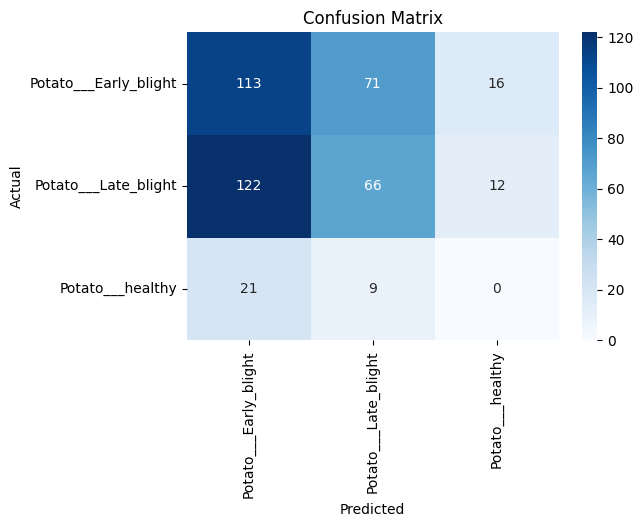

                       precision    recall  f1-score   support

Potato___Early_blight       0.44      0.56      0.50       200
 Potato___Late_blight       0.45      0.33      0.38       200
     Potato___healthy       0.00      0.00      0.00        30

             accuracy                           0.42       430
            macro avg       0.30      0.30      0.29       430
         weighted avg       0.42      0.42      0.41       430



In [49]:
#Problem 5 - Evaluation
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_gen.class_indices.keys(), yticklabels=train_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=train_gen.class_indices.keys()))

In [51]:
from tensorflow.keras.models import load_model

model.save('potato_model.h5')

# Load
loaded_model = load_model('potato_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


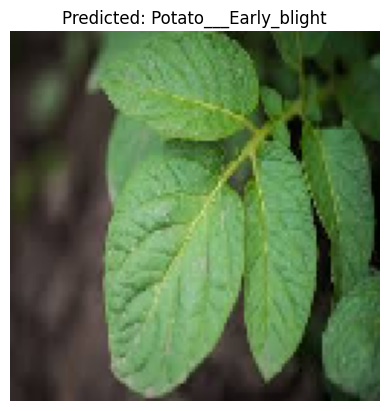

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


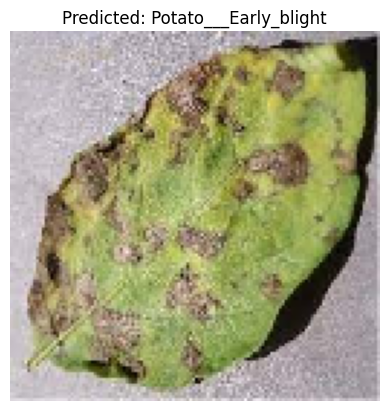

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


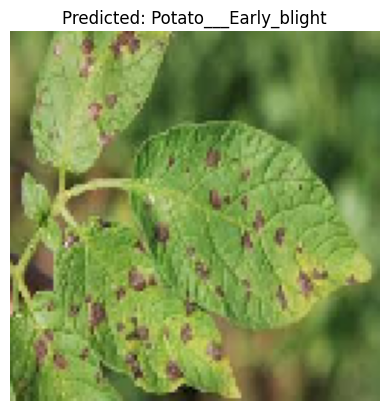

In [56]:
#Real Image Testing
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = loaded_model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = list(train_gen.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.title(f'Predicted: {class_name}')
    plt.axis('off')
    plt.show()

# Example: Replace with actual paths to your images in Google Drive
predict_image('/content/drive/MyDrive/Sem 7/ML/image 1.jpg')
predict_image('/content/drive/MyDrive/Sem 7/ML/image 2.jpg')
predict_image('/content/drive/MyDrive/Sem 7/ML/image 3.jpg')

In [57]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
